In [73]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier
import warnings
warnings.filterwarnings('ignore')

In [74]:
df=pd.read_csv('Fraud_check.csv')

In [75]:
df.head()

,Undergrad,Marital.Status,Taxable.Income,City.Population,Work.Experience,Urban
0,NO,Single,68833,50047,10,YES
1,YES,Divorced,33700,134075,18,YES
2,NO,Married,36925,160205,30,YES
3,YES,Single,50190,193264,15,YES
4,NO,Married,81002,27533,28,NO


In [76]:
print(df['Undergrad'].value_counts())
print(df['Marital.Status'].value_counts())
print(df["Urban"].value_counts())

YES    312
NO     288
Name: Undergrad, dtype: int64
Single      217
Married     194
Divorced    189
Name: Marital.Status, dtype: int64
YES    302
NO     298
Name: Urban, dtype: int64


In [77]:
df[df['Taxable.Income']<=30000].count()

Undergrad          124
Marital.Status     124
Taxable.Income     124
City.Population    124
Work.Experience    124
Urban              124
dtype: int64

In [78]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 600 entries, 0 to 599
Data columns (total 6 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Undergrad        600 non-null    object
 1   Marital.Status   600 non-null    object
 2   Taxable.Income   600 non-null    int64 
 3   City.Population  600 non-null    int64 
 4   Work.Experience  600 non-null    int64 
 5   Urban            600 non-null    object
dtypes: int64(3), object(3)
memory usage: 28.2+ KB


In [79]:
len(df['Taxable.Income'].unique())

599

In [80]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()

In [81]:
df['Urban']=le.fit_transform(df['Urban'])
df

,Undergrad,Marital.Status,Taxable.Income,City.Population,Work.Experience,Urban
0,NO,Single,68833,50047,10,1
1,YES,Divorced,33700,134075,18,1
2,NO,Married,36925,160205,30,1
3,YES,Single,50190,193264,15,1
4,NO,Married,81002,27533,28,0
...,...,...,...,...,...,...
595,YES,Divorced,76340,39492,7,1
596,YES,Divorced,69967,55369,2,1
597,NO,Divorced,47334,154058,0,1
598,YES,Married,98592,180083,17,0


In [82]:
df['Undergrad']=le.fit_transform(df['Undergrad'])
print(df)
df.columns

     Undergrad Marital.Status  Taxable.Income  City.Population  \
0            0         Single           68833            50047   
1            1       Divorced           33700           134075   
2            0        Married           36925           160205   
3            1         Single           50190           193264   
4            0        Married           81002            27533   
..         ...            ...             ...              ...   
595          1       Divorced           76340            39492   
596          1       Divorced           69967            55369   
597          0       Divorced           47334           154058   
598          1        Married           98592           180083   
599          0       Divorced           96519           158137   

     Work.Experience  Urban  
0                 10      1  
1                 18      1  
2                 30      1  
3                 15      1  
4                 28      0  
..               ...    ...

Index(['Undergrad', 'Marital.Status', 'Taxable.Income', 'City.Population',
       'Work.Experience', 'Urban'],
      dtype='object')

In [83]:
df['Marital.Status']=le.fit_transform(df['Marital.Status'])
print(df)

     Undergrad  Marital.Status  Taxable.Income  City.Population  \
0            0               2           68833            50047   
1            1               0           33700           134075   
2            0               1           36925           160205   
3            1               2           50190           193264   
4            0               1           81002            27533   
..         ...             ...             ...              ...   
595          1               0           76340            39492   
596          1               0           69967            55369   
597          0               0           47334           154058   
598          1               1           98592           180083   
599          0               0           96519           158137   

     Work.Experience  Urban  
0                 10      1  
1                 18      1  
2                 30      1  
3                 15      1  
4                 28      0  
..             

In [84]:
df.loc[df['Taxable.Income']<=30000,'Taxable.Income']=0
df

,Undergrad,Marital.Status,Taxable.Income,City.Population,Work.Experience,Urban
0,0,2,68833,50047,10,1
1,1,0,33700,134075,18,1
2,0,1,36925,160205,30,1
3,1,2,50190,193264,15,1
4,0,1,81002,27533,28,0
...,...,...,...,...,...,...
595,1,0,76340,39492,7,1
596,1,0,69967,55369,2,1
597,0,0,47334,154058,0,1
598,1,1,98592,180083,17,0


In [85]:
x=df.iloc[:,[0,1,3,4,5,]]
y=df.iloc[:,2]
x,y

(     Undergrad  Marital.Status  City.Population  Work.Experience  Urban
 0            0               2            50047               10      1
 1            1               0           134075               18      1
 2            0               1           160205               30      1
 3            1               2           193264               15      1
 4            0               1            27533               28      0
 ..         ...             ...              ...              ...    ...
 595          1               0            39492                7      1
 596          1               0            55369                2      1
 597          0               0           154058                0      1
 598          1               1           180083               17      0
 599          0               0           158137               16      0
 
 [600 rows x 5 columns],
 0      68833
 1      33700
 2      36925
 3      50190
 4      81002
        ...  
 595    76340

In [86]:
y

0      68833
1      33700
2      36925
3      50190
4      81002
       ...  
595    76340
596    69967
597    47334
598    98592
599    96519
Name: Taxable.Income, Length: 600, dtype: int64

In [87]:
y.sort_values

<bound method Series.sort_values of 0      68833
1      33700
2      36925
3      50190
4      81002
       ...  
595    76340
596    69967
597    47334
598    98592
599    96519
Name: Taxable.Income, Length: 600, dtype: int64>

In [88]:
from sklearn.model_selection import train_test_split

In [89]:
xtrain,xtest,ytrain,ytest=train_test_split(x,y,test_size=0.3,random_state=40)
xtrain

,Undergrad,Marital.Status,City.Population,Work.Experience,Urban
3,1,2,193264,15,1
149,0,2,49505,25,0
212,1,0,112659,14,0
585,0,2,137622,2,1
524,1,1,164391,27,0
...,...,...,...,...,...
440,0,2,170407,13,1
165,1,1,38463,23,1
7,1,2,131253,3,1
219,1,0,26814,9,0


In [90]:
ytrain

3      50190
149    40220
212    62067
585    84557
524        0
       ...  
440    77312
165    91304
7      62774
219        0
326        0
Name: Taxable.Income, Length: 420, dtype: int64

In [91]:
xtest

,Undergrad,Marital.Status,City.Population,Work.Experience,Urban
159,1,2,28504,1,0
307,0,0,31819,25,0
253,1,2,77256,29,0
528,0,1,172612,10,0
137,1,2,115884,6,0
...,...,...,...,...,...
221,1,2,134135,14,0
390,1,2,57324,17,0
530,1,0,194421,17,1
232,1,1,150349,2,0


In [92]:
ytest

159    62209
307    62873
253    79869
528    91488
137        0
       ...  
221    43051
390    64437
530    93364
232        0
139    50087
Name: Taxable.Income, Length: 180, dtype: int64

In [93]:
from sklearn.tree import DecisionTreeClassifier

In [94]:
model=DecisionTreeClassifier(criterion="entropy",max_depth=5)

In [95]:
model.fit(xtrain,ytrain)

DecisionTreeClassifier(criterion='entropy', max_depth=5)

In [96]:
ypred=model.predict(xtest)

In [97]:
from sklearn.metrics import classification_report

In [98]:
print(classification_report(ytest,ypred))

              precision    recall  f1-score   support

           0       0.22      0.85      0.35        40
       31085       0.00      0.00      0.00         0
       31458       0.00      0.00      0.00         1
       31521       0.00      0.00      0.00         1
       31633       0.00      0.00      0.00         1
       31645       0.00      0.00      0.00         1
       31699       0.00      0.00      0.00         1
       31721       0.00      0.00      0.00         1
       32236       0.00      0.00      0.00         1
       32356       0.00      0.00      0.00         0
       32483       0.00      0.00      0.00         1
       32662       0.00      0.00      0.00         1
       33356       0.00      0.00      0.00         1
       33492       0.00      0.00      0.00         1
       33614       0.00      0.00      0.00         1
       33748       0.00      0.00      0.00         1
       34703       0.00      0.00      0.00         1
       35868       0.00    

In [99]:
model.score(xtrain,ytrain)

0.21904761904761905

In [100]:
from sklearn import tree

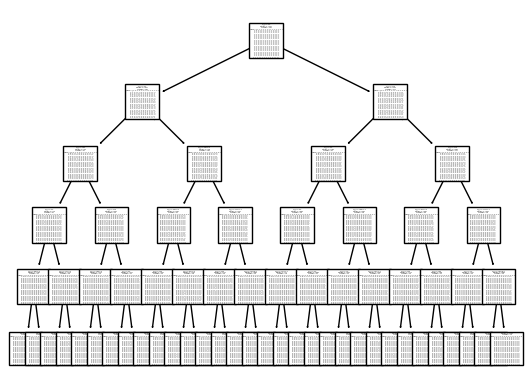

<Figure size 9600x7200 with 0 Axes>

In [101]:
tree.plot_tree(model)
plt.figure(dpi=1500)
plt.show()

In [ ]:
fn=['Undergrad',"Martial.Status","City.Population","Work.Experience","Urban"]
cn=['Risky',"Good"]
plt.figure(dpi=1500)
tree.plot_tree(model,feature_names = fn,class_names=cn,filled = True);

Index error occurred: list index out of range
Feature names: ['Undergrad', 'Martial.Status', 'City.Population', 'Work.Experience', 'Urban']
Class names: ['Risky', 'Good']


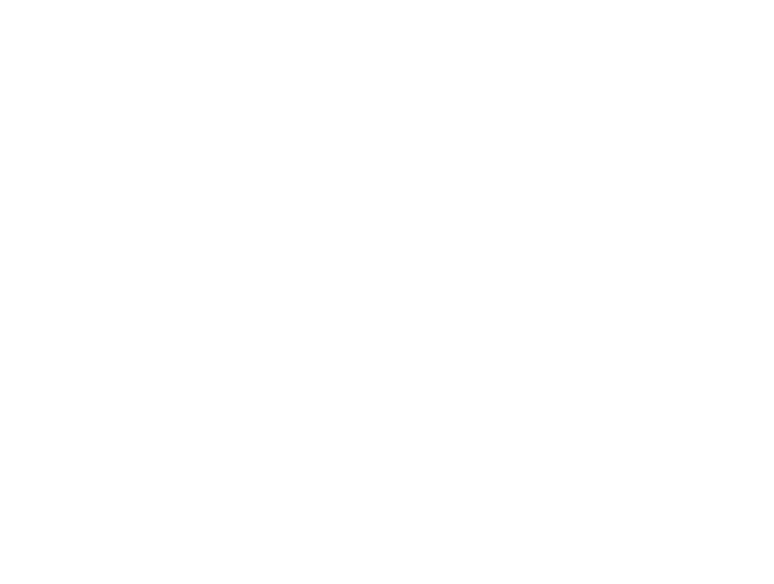

In [107]:
import matplotlib.pyplot as plt
from sklearn import tree

fn = ['Undergrad', 'Martial.Status', 'City.Population', 'Work.Experience', 'Urban']
cn = ['Risky', 'Good']

try:
    plt.figure(dpi=150)
    tree.plot_tree(model, feature_names=fn, class_names=cn, filled=True)
    plt.show()
except IndexError as e:
    print("Index error occurred:", e)
    print("Feature names:", fn)
    print("Class names:", cn)
except Exception as e:
    print("An error occurred:", e)